In [17]:
#importing packages & libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [18]:
# Assign the filename: oecd_usd_priv_pens (Total assets in funded and private pension plans, in USD million, 2001-2021)
oecd_usd_priv_pens = "/Users/andrewquinn/Analytics Project/Pension-Markets-in-Focus-2022-Statistical-Annex/Table A.B.2 Total assets in funded and private pension plans, in USD million, 2001-2021-Table 1.csv"
# Read the file into a DataFrame: df
df = pd.read_csv(oecd_usd_priv_pens)
# View the head of the DataFrame
print(df.head())
print(df.shape)

  OECD countries     2001     2002     2003       2004       2005       2006  \
0      Australia  263,408  292,623  358,915    442,936    583,888    678,162   
1    Austria (1)    5,585    8,749   11,795     14,125     13,833     16,783   
2    Belgium (2)   12,572   13,829   13,585     15,737     80,257     93,596   
3     Canada (3)  741,658  721,408  974,754  1,176,362  1,372,019  1,535,715   
4          Chile   35,385   35,826   49,224     60,535     74,508     88,293   

        2007       2008       2009  ...       2015       2016       2017  \
0  1,014,341  1,095,339    867,429  ...  1,517,613  1,532,849  1,838,865   
1     19,359     17,460     20,259  ...     22,393     21,980     26,772   
2    114,350    107,602    120,155  ...    132,722    138,317    190,735   
3  1,951,002  1,391,903  1,711,494  ...  2,225,732  2,378,020  2,721,976   
4    111,277     74,313    118,052  ...    154,711    174,480    210,512   

        2018       2019       2020       2021 Unnamed: 22 Unna

In [19]:
# Identify a list of columns to delete
columns_to_delete = df.columns[1:20]  

# Delete this list using .drop
df = df.drop(columns=columns_to_delete)  # Drop the specified columns

# Check if list of columns have been removed
print(df.head())
print(df.shape)

  OECD countries       2020       2021 Unnamed: 22  Unnamed: 23  Unnamed: 24
0      Australia  1,797,259  2,291,929                      NaN          NaN
1    Austria (1)     30,634     30,550                      NaN          NaN
2    Belgium (2)    223,702         ..                      NaN          NaN
3     Canada (3)  3,081,679  3,218,436                      NaN          NaN
4          Chile    208,482    167,556                      NaN          NaN
(100, 6)


In [20]:
# Remove the last four columns
df = df.iloc[:, :-4]  

# Check if last four columns have been removed
print(df.head())
print(df.shape)

  OECD countries       2020
0      Australia  1,797,259
1    Austria (1)     30,634
2    Belgium (2)    223,702
3     Canada (3)  3,081,679
4          Chile    208,482
(100, 2)


In [21]:
print(df.tail(6))

                                       OECD countries        2020
94                                      Zimbabwe (32)       1,348
95                           Regional indicators (33)         NaN
96                                         Total OECD  54,308,166
97                            Total selected non-OECD   1,999,975
98                                                NaN         NaN
99  Note: The total amount of investments of funde...         NaN


In [22]:
# Remove the last five rows
df = df.iloc[:-5, :]  

# Check if last 5 rows have been removed
print(df.tail(6))
print(df.shape)

         OECD countries    2020
89  Trinidad and Tobago   8,140
90               Uganda   4,161
91              Ukraine     123
92              Uruguay  16,143
93               Zambia     525
94        Zimbabwe (32)   1,348
(95, 2)


In [23]:
#Remove nil values and check result
df=df.dropna()
print(df)

   OECD countries       2020
0       Australia  1,797,259
1     Austria (1)     30,634
2     Belgium (2)    223,702
3      Canada (3)  3,081,679
4           Chile    208,482
..            ...        ...
90         Uganda      4,161
91        Ukraine        123
92        Uruguay     16,143
93         Zambia        525
94  Zimbabwe (32)      1,348

[94 rows x 2 columns]


In [24]:
# Only 1 row removed, on investigation ".." in the dataframe is not a missing value, delete this field using boolean indexing instead
df = df[~df.eq('..').any(axis=1)]
print(df)

   OECD countries       2020
0       Australia  1,797,259
1     Austria (1)     30,634
2     Belgium (2)    223,702
3      Canada (3)  3,081,679
4           Chile    208,482
..            ...        ...
90         Uganda      4,161
91        Ukraine        123
92        Uruguay     16,143
93         Zambia        525
94  Zimbabwe (32)      1,348

[86 rows x 2 columns]


In [25]:
#Repeat above steps for new dataframe df1 (Total assets in funded and private pension plans, as a % of GDP, 2001-2021)
oecd_gdp_priv_pens = "/Users/andrewquinn/Analytics Project/Pension-Markets-in-Focus-2022-Statistical-Annex/Total assets in funded and private pension plans, as a % of GDP, 2001-2021-Table 1_modified.csv"
df1 = pd.read_csv(oecd_gdp_priv_pens)
columns_to_delete = df1.columns[1:20]  
df1 = df1.drop(columns=columns_to_delete)  
df1 = df1.iloc[:-5, :-4] 
df1=df1.dropna()
df1 = df1[~df1.eq('..').any(axis=1)]
print(df1)

              Countries   2020
0             Australia  132.2
1           Austria (1)    6.6
2           Belgium (2)   39.9
3            Canada (3)  179.5
4                 Chile   75.9
..                  ...    ...
86             Suriname   13.1
88             Thailand    8.1
89  Trinidad and Tobago   37.9
90               Uganda   10.8
91              Ukraine    0.1

[82 rows x 2 columns]


In [26]:
#Merge the two dataframes as "merged_df"
merged_df = pd.merge(df1, df, left_on='Countries', right_on='OECD countries', how='inner', suffixes =(' $Mil', ' %GDP'))
merged_df = merged_df.drop('OECD countries', axis=1)
print(merged_df)

              Countries 2020 $Mil  2020 %GDP
0             Australia     132.2  1,797,259
1           Austria (1)       6.6     30,634
2           Belgium (2)      39.9    223,702
3            Canada (3)     179.5  3,081,679
4                 Chile      75.9    208,482
..                  ...       ...        ...
77             Suriname      13.1        355
78             Thailand       8.1     42,198
79  Trinidad and Tobago      37.9      8,140
80               Uganda      10.8      4,161
81              Ukraine       0.1        123

[82 rows x 3 columns]


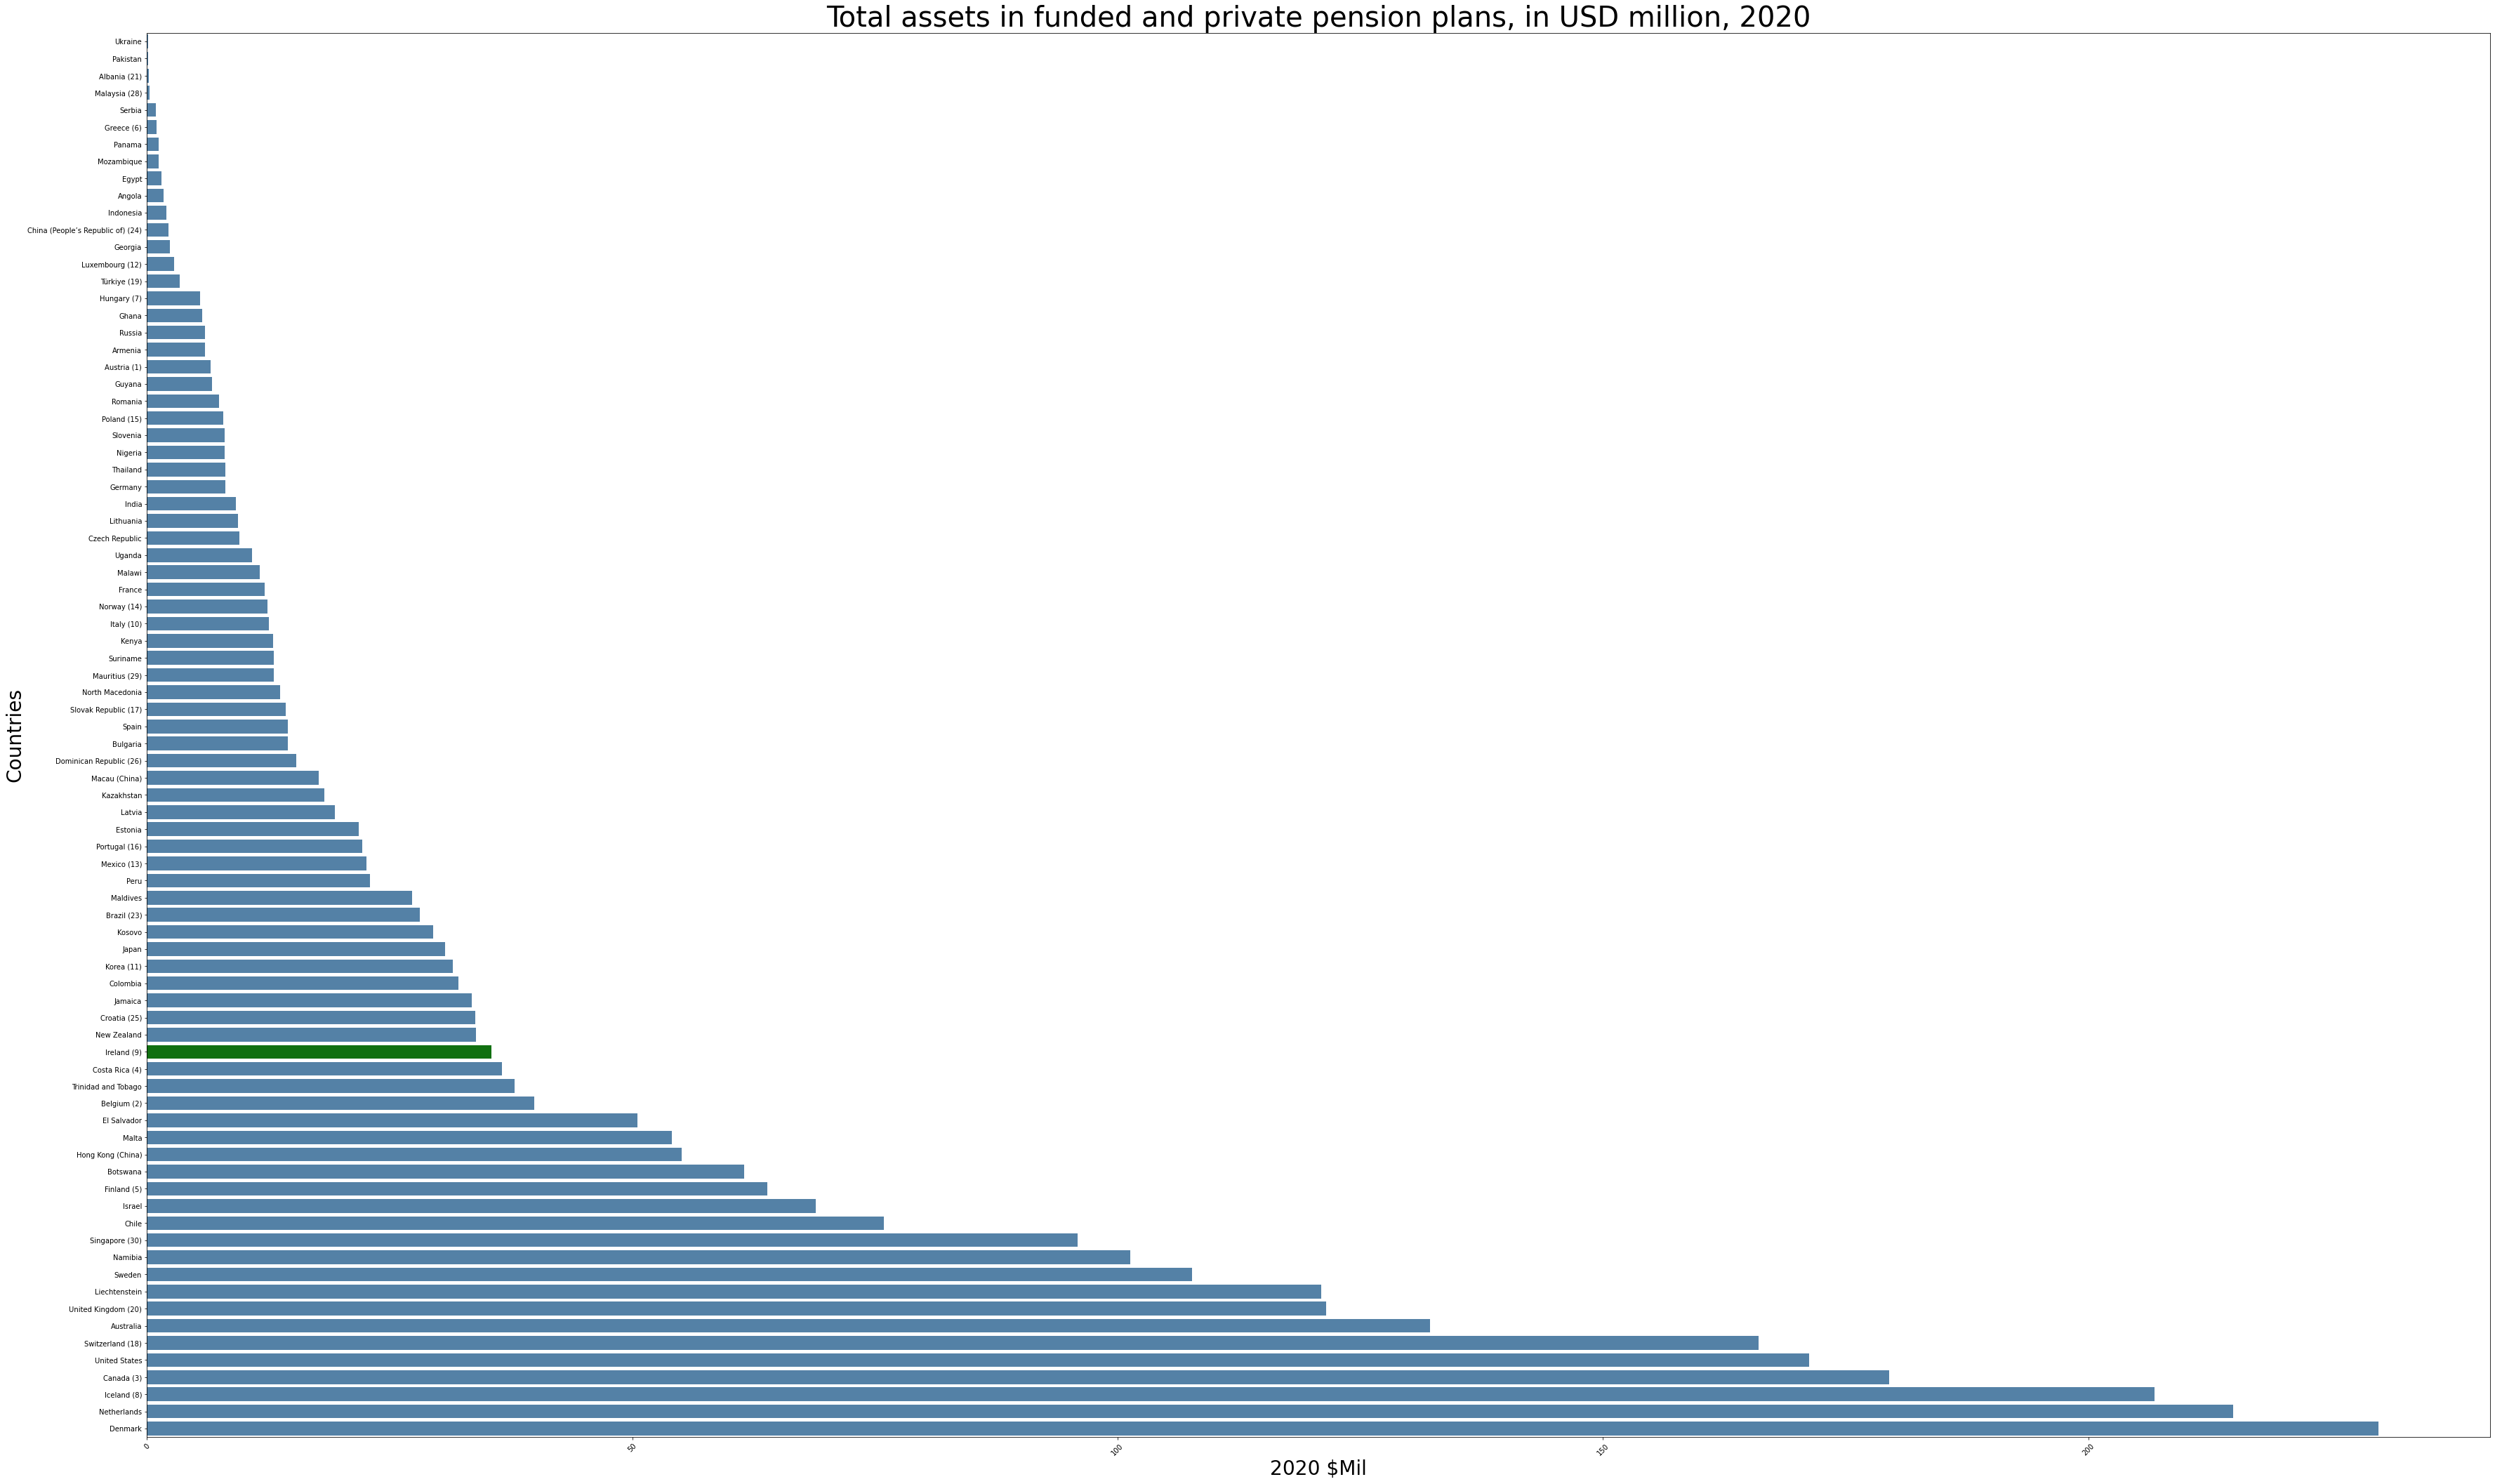

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sort the dataframe by the column '2020 $Mil'
sorted_df = merged_df.sort_values('2020 $Mil')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(50, 30))

# Create a custom color palette with green for Ireland
custom_palette = ['green' if country == 'Ireland (9)' else 'steelblue' for country in sorted_df['Countries']]

# Create the bar chart using Seaborn with the custom color palette
sns.barplot(x=sorted_df['2020 $Mil'], y=sorted_df['Countries'], ax=ax1, palette=custom_palette)

# Set the labels and title
ax1.set_xlabel('2020 $Mil', fontsize=28)
ax1.set_ylabel('Countries', fontsize=28)
ax1.set_title('Total assets in funded and private pension plans, in USD million, 2020', fontsize=40)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust spacing between subplots and labels
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()
